In [117]:
import numpy as np 
import pandas as pd 
import os
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
pwd = os.getcwd()
file_path = os.path.join(pwd, 'DataAnalyst.csv')

In [3]:
df = pd.read_csv(file_path)

In [4]:
df.drop(columns="Unnamed: 0",inplace=True)

check for missing value

In [5]:
missing_value = df.isnull().sum()
missing_value

Job Title            0
Salary Estimate      0
Job Description      0
Rating               0
Company Name         1
Location             0
Headquarters         0
Size                 0
Founded              0
Type of ownership    0
Industry             0
Sector               0
Revenue              0
Competitors          0
Easy Apply           0
dtype: int64

In [6]:
df["Company Name"].fillna(value="Unknown",inplace=True)

In [7]:
df.replace(-1,np.nan,inplace=True)
df.replace(-1.0,np.nan,inplace=True)
df.replace("-1",np.nan,inplace=True)

In [8]:
df["Salary Estimate"].fillna(0,inplace=True)

In [18]:
df['Company Name']=df['Company Name'].str.split('\n', 1,expand=True)

In [19]:
df

,Job Title,Salary Estimate,Job Description,Rating,Company Name,Location,Headquarters,Size,Founded,Type of ownership,Industry,Sector,Revenue,Competitors,Easy Apply
0,"Data Analyst, Center on Immigration and Justic...",$37K-$66K (Glassdoor est.),Are you eager to roll up your sleeves and harn...,3.2,Vera Institute of Justice,"New York, NY","New York, NY",201 to 500 employees,1961.0,Nonprofit Organization,Social Assistance,Non-Profit,$100 to $500 million (USD),NaN,True
1,Quality Data Analyst,$37K-$66K (Glassdoor est.),Overview\n\nProvides analytical and technical ...,3.8,Visiting Nurse Service of New York,"New York, NY","New York, NY",10000+ employees,1893.0,Nonprofit Organization,Health Care Services & Hospitals,Health Care,$2 to $5 billion (USD),NaN,NaN
2,"Senior Data Analyst, Insights & Analytics Team...",$37K-$66K (Glassdoor est.),We’re looking for a Senior Data Analyst who ha...,3.4,Squarespace,"New York, NY","New York, NY",1001 to 5000 employees,2003.0,Company - Private,Internet,Information Technology,Unknown / Non-Applicable,GoDaddy,NaN
3,Data Analyst,$37K-$66K (Glassdoor est.),Requisition NumberRR-0001939\nRemote:Yes\nWe c...,4.1,Celerity,"New York, NY","McLean, VA",201 to 500 employees,2002.0,Subsidiary or Business Segment,IT Services,Information Technology,$50 to $100 million (USD),NaN,NaN
4,Reporting Data Analyst,$37K-$66K (Glassdoor est.),ABOUT FANDUEL GROUP\n\nFanDuel Group is a worl...,3.9,FanDuel,"New York, NY","New York, NY",501 to 1000 employees,2009.0,Company - Private,Sports & Recreation,"Arts, Entertainment & Recreation",$100 to $500 million (USD),DraftKings,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2248,RQS - IHHA - 201900004460 -1q Data Security An...,$78K-$104K (Glassdoor est.),Maintains systems to protect data from unautho...,2.5,"Avacend, Inc.","Denver, CO","Alpharetta, GA",51 to 200 employees,NaN,Company - Private,Staffing & Outsourcing,Business Services,Unknown / Non-Applicable,NaN,NaN
2249,Senior Data Analyst (Corporate Audit),$78K-$104K (Glassdoor est.),Position:\nSenior Data Analyst (Corporate Audi...,2.9,Arrow Electronics,"Centennial, CO","Centennial, CO",10000+ employees,1935.0,Company - Public,Wholesale,Business Services,$10+ billion (USD),"Avnet, Ingram Micro, Tech Data",NaN
2250,"Technical Business Analyst (SQL, Data analytic...",$78K-$104K (Glassdoor est.),"Title: Technical Business Analyst (SQL, Data a...",NaN,Spiceorb,"Denver, CO",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2251,"Data Analyst 3, Customer Experience",$78K-$104K (Glassdoor est.),Summary\n\nResponsible for working cross-funct...,3.1,Contingent Network Services,"Centennial, CO","West Chester, OH",201 to 500 employees,1984.0,Company - Private,Enterprise Software & Network Solutions,Information Technology,$25 to $50 million (USD),NaN,NaN


In [20]:
df[['Job Title','Department']]=df['Job Title'].str.split(',',1, expand=True)

In [21]:
df[["Job Title","Department"]] = df[["Job Title","Department"]].astype(str)

In [24]:
df["Salary Estimate"] = df["Salary Estimate"].str.split("(",1,expand=True)

In [25]:
df[["Min Salary","Max Salary"]] = df["Salary Estimate"].str.split("-",expand=True)  

In [26]:
df["Min Salary"] = df["Min Salary"].str.lstrip("$").str.rstrip("K").fillna(0).astype(int)

In [27]:
df["Max Salary"] = df["Max Salary"].str.lstrip("$").str.rstrip("K ").fillna(0).astype(int)

In [28]:
df.drop(columns="Salary Estimate",inplace=True)

In [29]:
avgcol = df[["Min Salary","Max Salary"]]

In [30]:
df["Average Salary"] = avgcol.mean(axis=1)

In [31]:
df["Competitors"].fillna(value="No",inplace=True)

In [32]:
No_of_Openings_job_title =pd.DataFrame(df[df['Easy Apply']=="True"]['Job Title'].value_counts()).rename(columns={'Job Title':'No_of_openings'})

In [33]:
No_of_Openings_job_title = No_of_Openings_job_title.reset_index()

In [34]:
No_of_Openings_job_title.rename(columns={"index":"Job Title"},inplace=True)

NUMBER OF JOB OPENING FOR EACH JOB TITLE

In [35]:
No_of_Openings_job_title

,Job Title,No_of_openings
0,Data Analyst,17
1,Senior Data Analyst,8
2,Senior Data Quality Analyst,2
3,Data Base Programmer/Analyst,2
4,Senior Product Data Analyst,2
5,Lead Data Analyst,2
6,Senior Analyst,2
7,Data Validation Analyst,1
8,Data Analyst - Sr,1
9,AI Insights Data Analyst,1


TOP 10 DEMANDING DATA ANALYST JOBS

<AxesSubplot:xlabel='Job Title'>

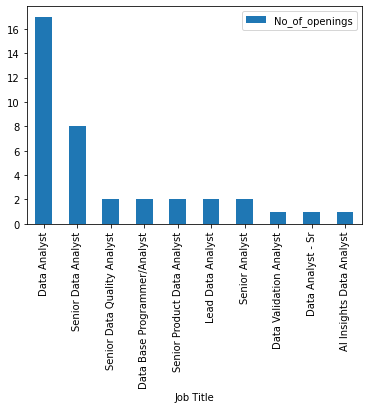

In [128]:
No_of_Openings_job_title.head(10).sort_values(by='No_of_openings',ascending=False).plot.bar(x="Job Title")

In [36]:
df["Average Salary"].astype(int)

0       51
1       51
2       51
3       51
4       51
        ..
2248    91
2249    91
2250    91
2251    91
2252    91
Name: Average Salary, Length: 2253, dtype: int64

In [97]:
revenue_salary = pd.DataFrame(df.groupby("Revenue",as_index=False)["Average Salary"].mean()).sort_values(by="Average Salary", ascending=False)

COMPANY REVENUE --- AVERAGE SALARY

In [101]:
revenue_salary

,Revenue,Average Salary
1,$1 to $5 million (USD),75.941441
6,$25 to $50 million (USD),73.972727
7,$5 to $10 billion (USD),73.732143
12,Unknown / Non-Applicable,73.496748
4,$100 to $500 million (USD),71.830275
5,$2 to $5 billion (USD),71.794574
11,Less than $1 million (USD),70.903226
2,$10 to $25 million (USD),70.553030
3,$10+ billion (USD),70.457672
8,$5 to $10 million (USD),70.451389


(68.0, 77.0)

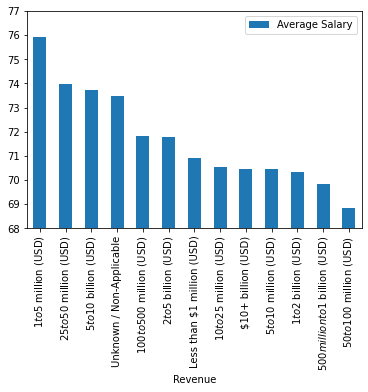

In [123]:
revenue_salary.plot.bar(x="Revenue")
plt.ylim((68,77))

In [39]:
df["Founded"].fillna(-1,inplace=True)

In [40]:
df["no_year"] = 2021-df["Founded"]

In [41]:
df["no_year"].replace(2022.0,0,inplace=True)

YEARS SINCE COMPANY FOUNDED --- AVERAGE SALARY

In [130]:
Com_Age_salary = pd.DataFrame(df.groupby("no_year",as_index=False)["Average Salary"].mean()).sort_values(by="Average Salary", ascending=False)
Com_Age_salary.reset_index(drop=True)

,no_year,Average Salary
0,114.0,138.5
1,97.0,138.5
2,95.0,122.5
3,93.0,113.0
4,164.0,113.0
...,...,...
156,154.0,41.5
157,165.0,39.5
158,152.0,37.5
159,171.0,36.5


/home/thai/miniconda3/envs/minimal_ds/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='no_year', ylabel='Average Salary'>

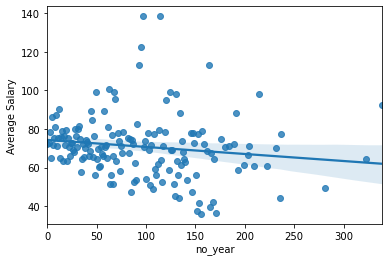

In [129]:
sns.regplot(Com_Age_salary['no_year'],Com_Age_salary['Average Salary'])

COMPANY YEARS SINCE FOUNDED --- COMPANY REVENUE

In [137]:
Com_age_revenue = pd.DataFrame(df.groupby("Revenue",as_index=False)["no_year"].mean()).sort_values(by="no_year", ascending=False).reset_index(drop=True)

In [141]:
Com_age_revenue

,Revenue,no_year
0,$10+ billion (USD),97.650794
1,$5 to $10 billion (USD),67.732143
2,$2 to $5 billion (USD),66.069767
3,$1 to $2 billion (USD),55.988506
4,$500 million to $1 billion (USD),37.189873
5,$100 to $500 million (USD),30.559633
6,$50 to $100 million (USD),25.005025
7,$25 to $50 million (USD),21.909091
8,$10 to $25 million (USD),19.053030
9,Unknown / Non-Applicable,18.100813


<AxesSubplot:xlabel='Revenue'>

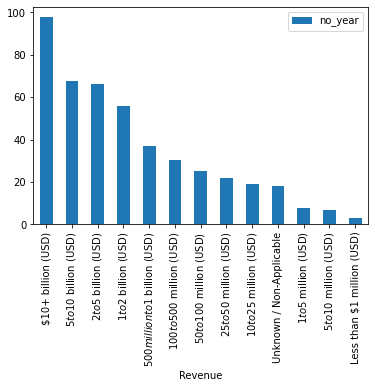

In [145]:
Com_age_revenue.plot.bar(x="Revenue")

In [105]:
Com_age_revenue_salary = pd.merge(left = revenue_salary, right = Com_age_revenue, how ="outer", left_on = ["Revenue"], right_on = ["Revenue"])

COMPANY REVENUE --- AVERAGE SALARY --- YEARS SINCE FOUNDED

In [106]:
Com_age_revenue_salary

,Revenue,Average Salary,no_year
0,$1 to $5 million (USD),75.941441,7.909910
1,$25 to $50 million (USD),73.972727,21.909091
2,$5 to $10 billion (USD),73.732143,67.732143
3,Unknown / Non-Applicable,73.496748,18.100813
4,$100 to $500 million (USD),71.830275,30.559633
5,$2 to $5 billion (USD),71.794574,66.069767
6,Less than $1 million (USD),70.903226,2.946237
7,$10 to $25 million (USD),70.553030,19.053030
8,$10+ billion (USD),70.457672,97.650794
9,$5 to $10 million (USD),70.451389,6.847222
